<a href="https://colab.research.google.com/github/BakhtiyDeveloper/data_science_lessons/blob/main/Animals_proyekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ushbu model sun'iy intellekt yordamida ob'yektlarni klassifikatsiya (sinflay) oladigan model bo'ladi

In [2]:
import torch
import fastai

Fastia kutubhonasini 2.5.3 versiyasini o'rnatib olamiz

bizga kerakli kutubhonalar



1.  torch==1.10.0+cu111 versiyasi   

2.  fastai==2.5.3 versiyasi
    

In [2]:
!pip install fastai==2.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 881.9/881.9 MB 121.0 MB/s eta 0:00:01tcmalloc: large alloc 1102422016 bytes == 0x37388000 @  0x7f629778e680 0x7f62977aeda2 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 21.4 MB/s e



Kutubhonalarni versiyalarini tekshiramiz 

In [3]:
print(torch.__version__)
print(fastai.__version__)

1.10.2+cu102
2.5.3


##DATASET
Ushbu loyihada Google ning [Open Imeges Dataset v4](https://https://storage.googleapis.com/openimages/web/factsfigures_v4.html) ochiq ma'lumotlaridan foydalandim. Ushbu dataset [600](https://https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy_visualizer/circle.html) sinflarga (klasslarga) ajratilgan 1.7 mln rasmlarni o'z ichiga olgan. 



Ushbu rasmlarni yuklab olish uchun va dataset bilan tanishish uchun quyidagi repozitorydan foydalandim: [github.com/EscVM/OIDv4_ToolKit.git](https://github.com/EscVM/OIDv4_ToolKit.git)

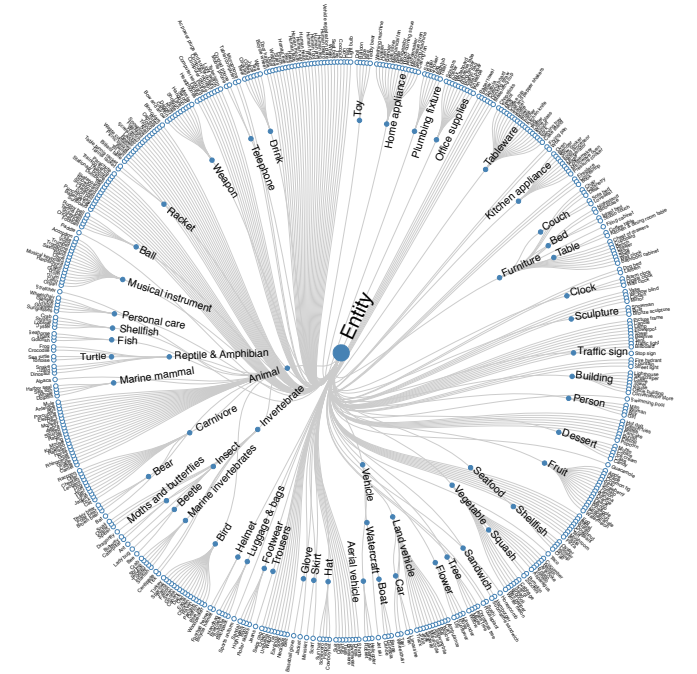





In [4]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 30.24 MiB/s, done.
Resolving deltas: 100% (146/146), done.


#OIDv4_ToolKit ning **requirement.txt** fayli yordamida keraklik paketlarni o'rnatamiz
pandas

numpy

awscli

urllib3

tqdm

opencv-python


In [5]:
!cd OIDv4_ToolKit && pip install -r requirements.txt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


**main.py** fayli orqali qanday amallarni bajarish mumkinligini bilib olamiz 

In [6]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

optional arguments:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    data

In [22]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content/Images_data --classes Bear Bird Shellfish Mammal Fish Turtle Carnivore Person --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Bear.

Bear
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 353 online images for train.
    [INFO] | Limiting to 200 images.
    [INFO] | All images already downloaded.
    [INFO

In [23]:
from fastai.vision.all import *
from ipywidgets import widgets 

In [24]:
path = Path("/content/Images_data/train")
path.ls()

(#13) [Path('/content/Images_data/train/Marine invertebrates'),Path('/content/Images_data/train/Invertebrate'),Path('/content/Images_data/train/Person'),Path('/content/Images_data/train/Reptile'),Path('/content/Images_data/train/Turtle'),Path('/content/Images_data/train/Bird'),Path('/content/Images_data/train/Shellfish'),Path('/content/Images_data/train/Bear'),Path('/content/Images_data/train/Animal'),Path('/content/Images_data/train/Carnivore')...]

In [25]:
get_img = get_image_files(path)
get_img

(#6105) [Path('/content/Images_data/train/Invertebrate/e8e2e87978baaf86.jpg'),Path('/content/Images_data/train/Invertebrate/0fbbfdf516ad7f3f.jpg'),Path('/content/Images_data/train/Invertebrate/59d70364e18914b2.jpg'),Path('/content/Images_data/train/Invertebrate/b705a3baa18fba6b.jpg'),Path('/content/Images_data/train/Invertebrate/1bf347ed044427dc.jpg'),Path('/content/Images_data/train/Invertebrate/387324cd736b8ae9.jpg'),Path('/content/Images_data/train/Invertebrate/3d57f05431ef0134.jpg'),Path('/content/Images_data/train/Invertebrate/45a68019c4164200.jpg'),Path('/content/Images_data/train/Invertebrate/c21732e89126723a.jpg'),Path('/content/Images_data/train/Invertebrate/acdff0b509f9ec76.jpg')...]

In [26]:
fail_img = verify_images(path)
fail_img

'PosixPath' object is not iterable


(#0) []

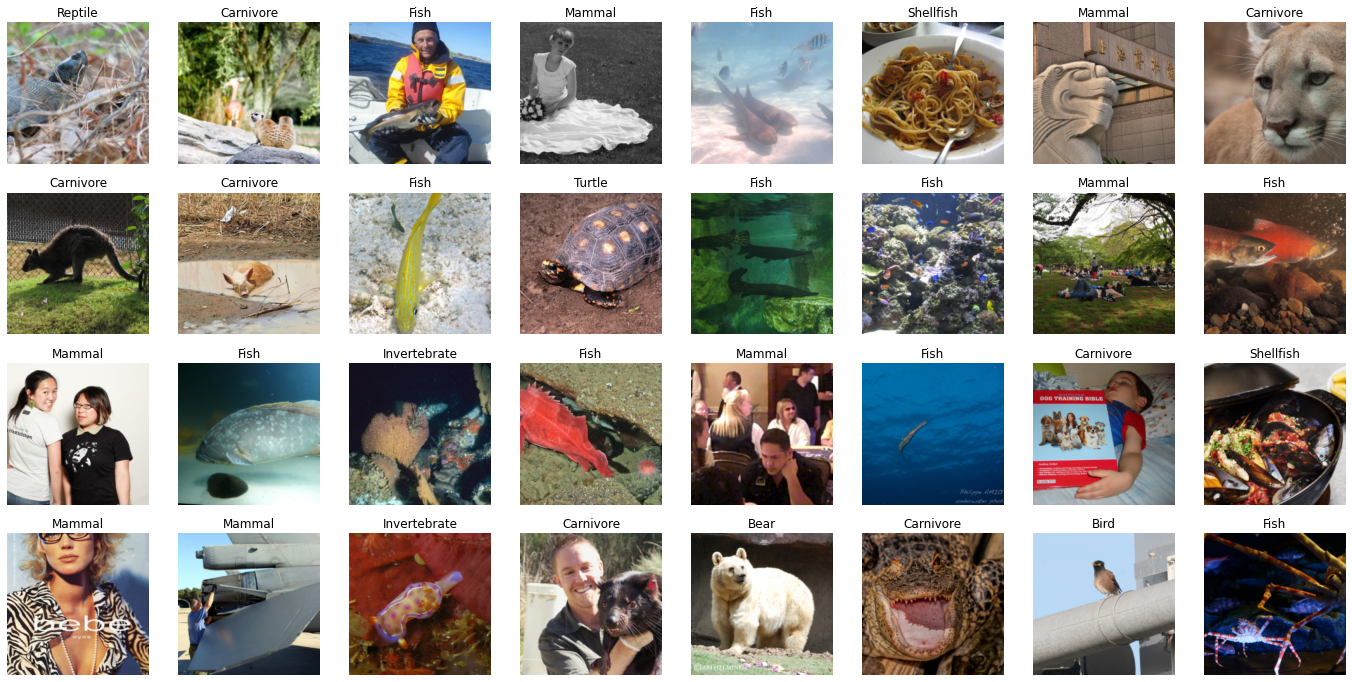

In [27]:
animals_class = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)  
)

# Dataloaders 

dls = animals_class.dataloaders(path)

#datasetni tekshiramiz

dls.train.show_batch(max_n=32, nrows=4)

In [28]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(6)

epoch,train_loss,valid_loss,accuracy,time
0,1.798018,1.007935,0.683866,01:43


epoch,train_loss,valid_loss,accuracy,time
0,1.057204,0.923598,0.710074,01:43
1,0.836020,0.984509,0.705160,01:43
2,0.598271,1.005199,0.717445,01:43
3,0.365781,0.992367,0.723997,01:42
4,0.207543,1.015035,0.741196,01:44
5,0.140318,1.011141,0.741196,01:44


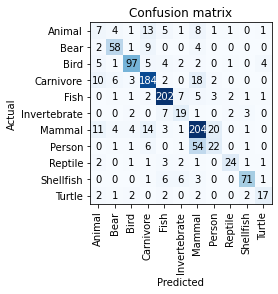

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

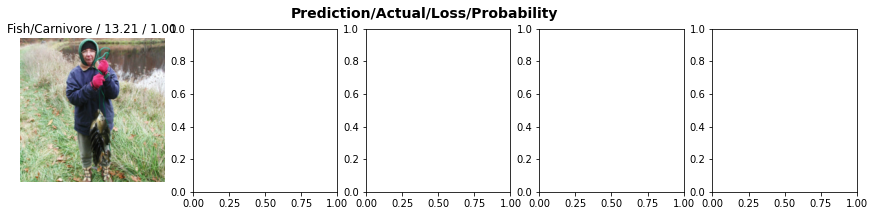

In [30]:
interp.plot_top_losses(5, nrows=1)

In [31]:
upload = widgets.FileUpload()
upload 

FileUpload(value={}, description='Upload')

Bashorat: Fish 
Ehtomolligi: 99.9%


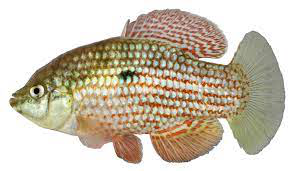

In [80]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
if probs[pred_id]*100 > 75:
  print(f"Bashorat: {pred} ")
  print(f"Ehtomolligi: {probs[pred_id]*100:.1f}%")
else:
  print("Yuklangan rasmda hatolik bor!!!! Iltimos boshqa rasm bilan urunib ko'ring")
img

In [73]:
learn.export("AnimalsClass_proyekt_model.pkl")

In [74]:
model = load_learner("/content/AnimalsClass_proyekt_model.pkl")

In [75]:
model.predict(img)

('Reptile',
 TensorBase(8),
 TensorBase([1.6737e-04, 2.5592e-03, 5.0902e-04, 3.0135e-03, 1.2509e-05, 1.5819e-05,
         5.7091e-06, 2.0021e-05, 8.4444e-01, 2.1349e-05, 1.4923e-01]))